# MDI 720
# TP1 - Partie II

## 2 Introduction à Pandas, Matplotlib, etc.
Deuxième partie du TP1.

Le notebook suit le déroulé des questions tel qu'il est décrit dans l'énoncé disponible sous ce [lien](http://josephsalmon.eu/enseignement/TELECOM/MDI720/TP_intro_python_fr.pdf).

Toutefois, en amont des questions, une séries de commandes doivent être exécuter, à savoir:
* Importer les librairies Python
* Initialiser les représentations graphiques
* Importer les données
* Décrire rapidement les données
Une fois ces étapes accomplies, nous répondrons aux questions.


### Importer les librairies Pyhton:

In [1]:
from os import path
import pandas as pd
import urllib
import zipfile
import sys
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
%matplotlib inline


### Initialiser les représentations graphiques:

In [2]:
imageformat = '.pdf'
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Computer Modern Roman']})
params = {'axes.labelsize': 12,
          'font.size': 12,
          'legend.fontsize': 12,
          'xtick.labelsize': 8,
          'ytick.labelsize': 10,
          'text.usetex': True,
          'figure.figsize': (16, 8)}
plt.rcParams.update(params)

sns.set_context("poster")
sns.set_palette("colorblind")
sns.axes_style()
sns.set_style({'legend.frameon': True})
color_blind_list = sns.color_palette("colorblind", 8)
my_orange = color_blind_list[2]
my_green = color_blind_list[1]
my_blue = color_blind_list[0]

plt.close("all")


### Importer les données:

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00235/'
filename = 'household_power_consumption'
zipfilename = filename + '.zip'
Location = url + zipfilename

# testing existence of file:
if sys.version_info >= (3, 0):
    if not(path.isfile('zipfilename')):
        urllib.request.urlretrieve(Location, zipfilename)
    else:
        if not(path.isfile('zipfilename')):
            urllib.urlretrieve(Location, zipfilename)
            
# unzip part
zip = zipfile.ZipFile(zipfilename)
zip.extractall()
na_values = ['?', '']
fields = ['Date', 'Time', 'Global_active_power']
df = pd.read_csv(filename + '.txt', sep=';', nrows=200000,
na_values=na_values, usecols=fields)


### Décrire rapidement les données:

Les cinq premières lignes:

In [4]:
df.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


Résultats de la fonstion describe():

In [5]:
df.describe()

,Global_active_power
count,196268.000000
mean,1.352544
std,1.280684
min,0.104000
25%,0.314000
50%,1.072000
75%,1.992500
max,10.670000


Représentation graphique de la métrique:

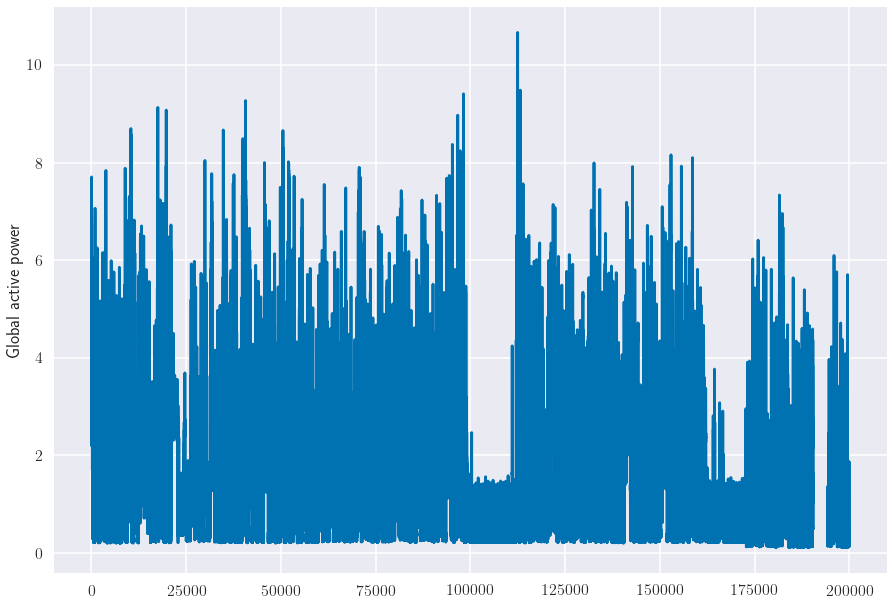

In [7]:
x = df.index
y = df['Global_active_power']

fig, ax = plt.subplots()

ax.plot(x, y)
ax.set_ylabel('Global active power')

fig.tight_layout()
plt.show()


### 1) Détecter et dénombrer le nombre de lignes ayant des valeurs manquantes
Nous pouvons détecter les valeurs manquantes grâce à la fonction pd.isnull()

In [8]:
df_null = df[df.isnull().any(1)] # any(1) pour récupérer toutes les lignes où au moins une colones est nulle
print(df_null.shape)

(3732, 3)


Il y a donc 3 732 valeurs manquantes sur un total de 196 268.


### 2) Supprimer toutes les lignes avec valeurs manquantes
Nous pouvons retirer du dataFrame initial les valeurs que nous avons détectées dans la précédente question

In [9]:
df_clean = df[~df.index.isin(df_null.index)] # '~' permet de prendre le contraire de '.isin()'
print(df_clean.shape)

(196268, 3)



### 3) Créer une time series
Créons d'abord un nouvel index à partir des colonnes 'Date' et 'Time', en utilisant la fonction pd.to_datetime:

In [12]:
df_clean['Date_Time'] = df_clean[['Date','Time']].apply(lambda x: pd.to_datetime(x[0]+ ' ' + x[1],dayfirst=True),axis=1)

Ainsi nous pouvons remplacer le précédent index par le nouveau:

In [11]:
df_timeIndex = df_clean.set_index('Date_Time')[['Global_active_power']] # seule la métrique compte
df_timeIndex.head()

,Global_active_power
Date_Time,
2006-12-16 17:24:00,4.216
2006-12-16 17:25:00,5.360
2006-12-16 17:26:00,5.374
2006-12-16 17:27:00,5.388
2006-12-16 17:28:00,3.666



### 4) Afficher le graphique des moyennes des températures journalières entre le 1er janvier et le 30 avril 2007
Filtrons dans un premier temps sur les dates comprises entre le 1er janvier et le 30 avril 2007:

In [13]:
df_dateFiltered = df_timeIndex['01/01/2007':'04/30/2007']

Calculons maintenant la moyenne journalière des temparétures sur ces dates:

In [14]:
df_dateFiltered_dailyMean = df_dateFiltered.resample('D').mean()

Enfin, produisons le graphique correspondant:

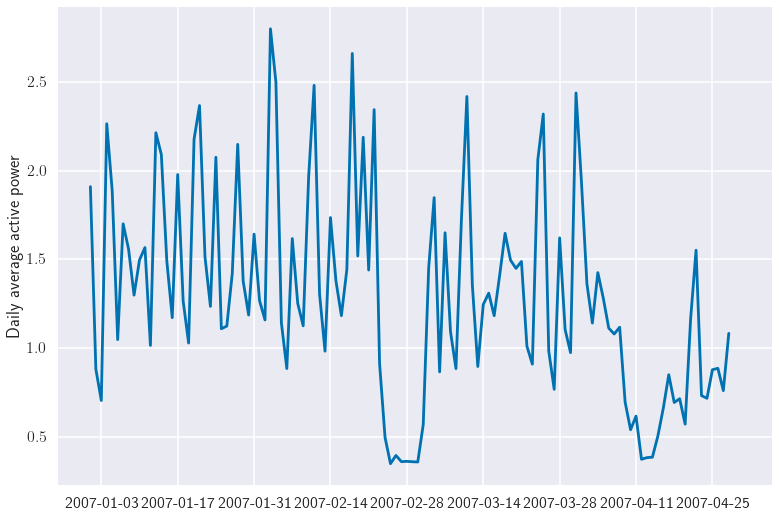

In [15]:
x = df_dateFiltered_dailyMean.index
y = df_dateFiltered_dailyMean['Global_active_power']

fig, ax = plt.subplots()
ax.set_ylabel('Daily average active power')

ax.plot(x, y)
plt.show()

La baisse de consommation par ménage que l'on voit fin février et début avril sont problament dues aux périodes de vancances à ces dates.

### 5) Charger les données de TG_STAID
Chargeons les données du fichier texte TGSTAID011249.txt disponible sur Eole.

In [16]:
import os
path = os.getcwd() # Mettre le fichier texte dans le current directory pour faire tourner le code localement
fileName = 'TGSTAID011249.txt'
na_values = ['-9999']
fields = ['Date', 'TG']

dtg = pd.read_csv(path+'/'+fileName, usecols = [2,3], names = fields,
                  sep = ',', na_values = na_values,
                  parse_dates = [0], date_parser = pd.to_datetime,
                  skiprows = 21)

dtg.TG = dtg.TG / 10 # Convertir les températures en Celsius
dtg.rename(columns = {'TG' : 'TG_C'}, inplace = True)

Visualisons les premières lignes de notre table:

In [17]:
dtg.head()

,Date,TG_C
0,1921-03-01,5.0
1,1921-03-02,4.6
2,1921-03-03,4.6
3,1921-03-04,3.1
4,1921-03-05,9.5


### 6) Créer une time series et la mettre en regard de la précédente
Tout d'abord, transformons la précédente table pour obtenir la température moyenne journalière entre le 1er janvier 2007 et le 30 avril 2007 sous forme de time series:

In [18]:
dtg.set_index('Date', inplace = True) # recupérer la date en index
dtg = dtg['2007-01-01':'2007-04-30'] # filtrer sur les dates de la précédente visualisation

Nous pouvons maintenant ajouter cette time series au précédent graphique:

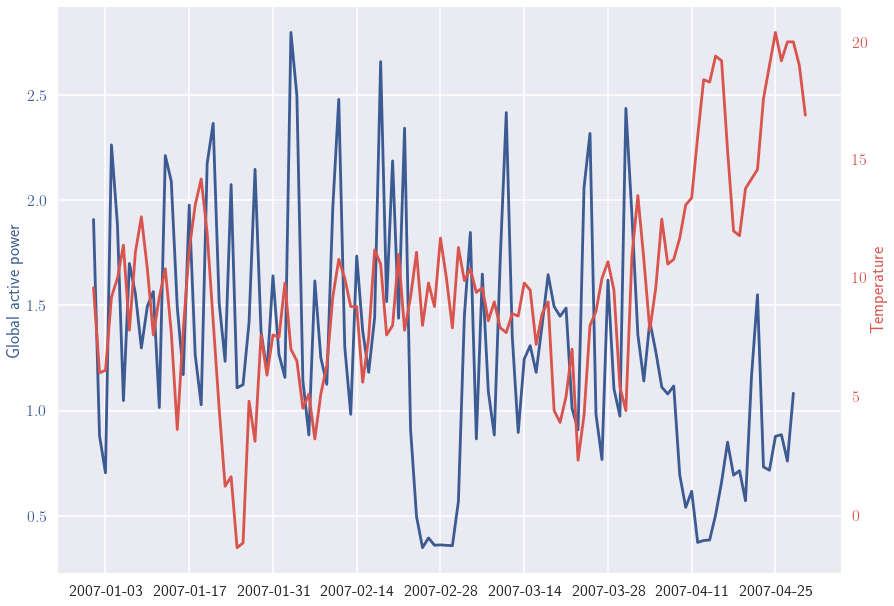

In [19]:
x = pd.date_range('1/1/2007', '30/4/2007', freq='D') # générer l'axe des abscisses

seaBlue = sns.xkcd_rgb["denim blue"]
seaRed = sns.xkcd_rgb["pale red"]

fig, ax1 = plt.subplots()
ax1.plot(x, df_dateFiltered_dailyMean['Global_active_power'], color=seaBlue)
ax1.set_ylabel('Global active power', color=seaBlue)
ax1.tick_params('y', colors=seaBlue)

ax2 = ax1.twinx() # permet de superposer les axes et de les synchroniser

ax2.plot(x, dtg['TG_C'], color=seaRed)
ax2.set_ylabel('Temperature', color=seaRed)
ax2.tick_params('y', colors=seaRed)
ax2.grid(None) # évite de superposer les grilles seaborn

fig.tight_layout()
plt.show()

### 7) Proposer une visualisation de la pollution moyenne par année (pour l'ozone)
Chargeons les données de airparifabae1bd78def4fe8a409ab8c95fc4608.zip disponible sur EOLE:

In [20]:
import os
path = os.getcwd() # Mettre le fichier texte dans le current directory pour faire tourner le code localement
zipFile = 'airparifabae1bd78def4fe8a409ab8c95fc4608.zip'
fileName = '20080421_20160927-PA13_auto.csv'
#na_values = ['-9999']
#fields = ['Date', 'TG']

zip = zipfile.ZipFile(zipFile)
zip.extractall()

na_values = ['n/d']
air = pd.read_csv(path+'/'+fileName, sep=';', na_values=na_values)

Nous pouvons retraiter le dataSet pour qu'il ne contaigne pas de valeurs manquantes et pour en faire une Time Series:

In [21]:
air.dropna(inplace=True) # enlever toutes les lignes où une valeur au moins est na

## Créer un index composer de la date et de l'heure en datetime
air.heure = air.heure.astype(int).astype(str).replace('24','0') # format heure de datetime va de 0 à 23
air['date_time'] = air.date + ' ' + air.heure
air['date_time'] = pd.to_datetime(air.date_time, format='%d/%m/%Y %H')
air.set_index('date_time', inplace=True)
air.drop(['date','heure'], axis=1, inplace=True)

Nous transformons la série pour obtenir la moyenne annuelle de pollution sur le dataSet:

In [22]:
air.NO2 = air.NO2.astype(int)
air.O3 = air.O3.astype(int)
air_mean = air.resample('A').mean()

Enfin, nous pouvons visualiser ces resultats:

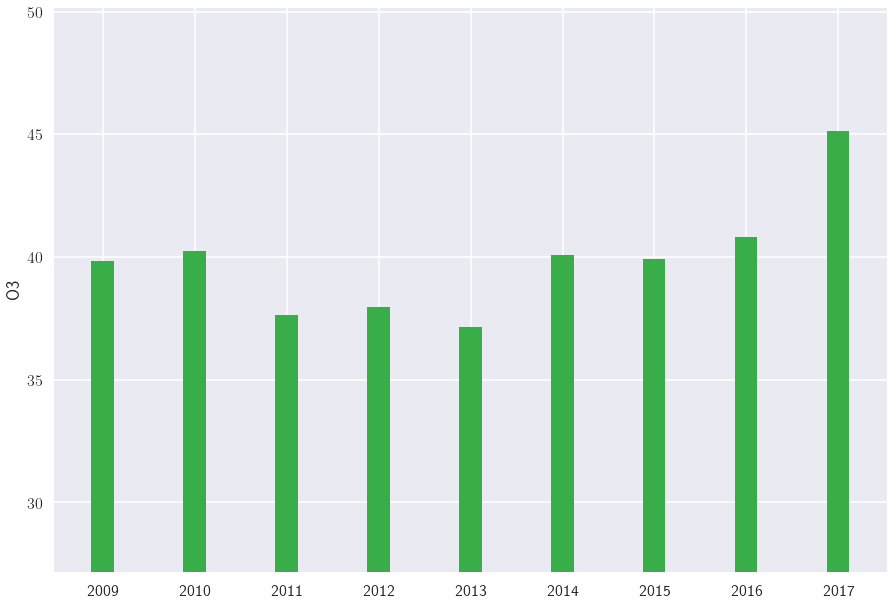

In [26]:
x = air_mean.index # générer l'axe des abscisses

seaGreen = sns.xkcd_rgb["medium green"]

fig, ax1 = plt.subplots()

width = 90
ylimMin = min(air_mean['O3']) - 10
ylimMax = max(air_mean['O3']) + 5

ax1.bar(x, air_mean['O3'], color=seaGreen, width = width)
ax1.set_ylim([ylimMin,ylimMax])
ax1.set_ylabel('O3')

fig.tight_layout()
plt.show()

### 8) Proposer une visualisation de la pollution la plus critique par année
On considère le moment critique de l'année au regard de la pollution lorsque cette dernière est maximale.
Ainsi, nous créons un dataSet reprenant le maximum annuelle des métriques à disposition:

In [24]:
air_max = air.resample('A').max()

Nous pouvons ainsi visualiser les résultats:

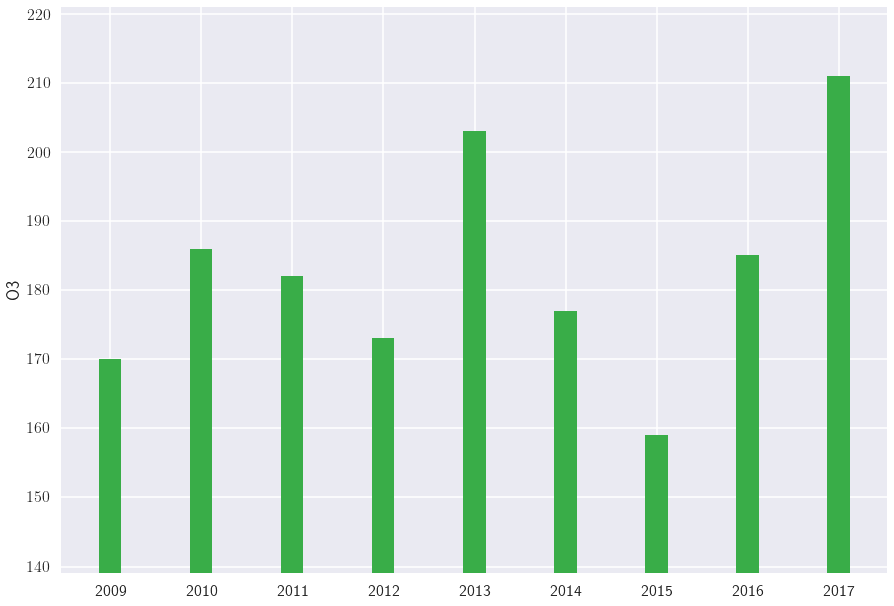

In [27]:
x = air_max.index # générer l'axe des abscisses

seaGreen = sns.xkcd_rgb["medium green"]

fig, ax1 = plt.subplots()

width = 90
ylimMin = min(air_max['O3']) - 20
ylimMax = max(air_max['O3']) + 10

ax1.bar(x, air_max['O3'], color=seaGreen, width = width)
ax1.set_ylim([ylimMin,ylimMax])
ax1.bar(x, air_max['O3'], color=seaGreen, width = 90)
ax1.set_ylabel('O3')

fig.tight_layout()
plt.show()

### 9) Donner une représentation par mois de la pollution. Quel est le mois le plus pollué ?
Nous devons calculer la pollution moyenne par mois du dataSet initial:

In [28]:
air_month = air.resample('M').mean()

Nous visualisons ces mois selon les deux métriques présentes dans le dataSet:

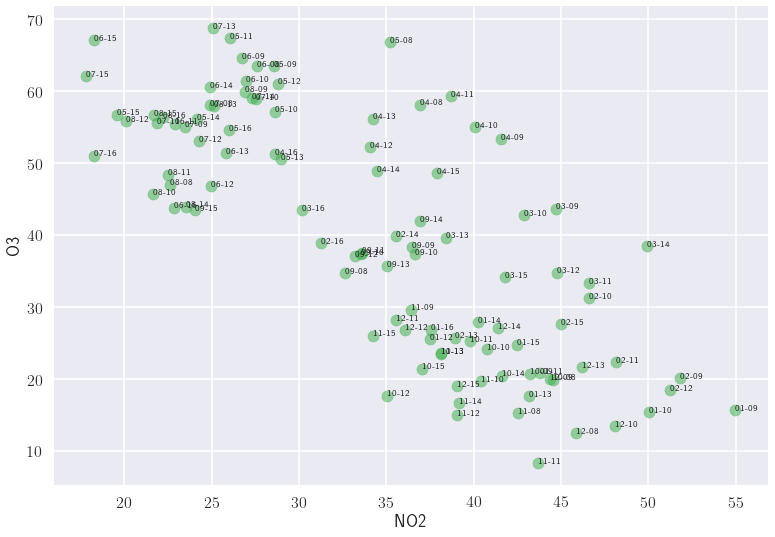

In [33]:
x = air_month.NO2
y = air_month.O3
n = air_month.index


seaGreen = sns.xkcd_rgb["medium green"]

fig, ax1 = plt.subplots()

ax1.scatter(x, y, color=seaGreen, alpha=0.5)#alphas)
ax1.set_xlabel('NO2')
ax1.set_ylabel('O3')

for i, txt in enumerate(n):
    ax1.annotate(txt.strftime('%m-%y'), (x[i],y[i]))

plt.rcParams.update({'font.size': 9})

fig.tight_layout
plt.show()

De cette dernière visualisation il apparaît que le mois le plus pollué selon O3 est celui de juillet 2013 tandis que le mois ayant la quantité de NO2 la plus importante dans l'air est celui de janvier 2009.